In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
from shape_inference import make_prediction, supress_nonmax_bboxes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


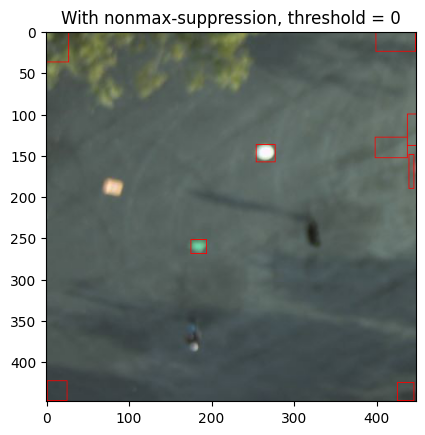

In [28]:

img = Image.open("example-shape.jpg")
outputs: list[np.ndarray] = make_prediction(img)
bboxes = supress_nonmax_bboxes(outputs[0][0], 0)
annotated_img = tf.keras.preprocessing.image.img_to_array(img)
for bbox in bboxes:
    color=(255,0,0)
    annotated_img = cv.rectangle(
        img=annotated_img, 
        pt1=np.flip(bbox[0:2].astype(int)), 
        pt2=np.flip(bbox[2:].astype(int)), 
        color=color)
plt.title("With nonmax-suppression, threshold = 0")
plt.imshow(annotated_img.astype(int))
plt.show()